In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('TABLE_III._Deaths_in_122_U.S._cities.csv')

# choosing reporting area as those based on time_zones
selected_df = df.iloc[0:10,:] 


In [59]:
#data cleaning and selection of data 
total_deaths = selected_df.iloc[-1,3]
prop_death_df = selected_df['All causes, by age (years), All Ages**'] / total_deaths
prop_death_df.index = selected_df['Reporting Area'] 
prop_death_df = prop_death_df[:-1].sort_values()


Text(0.5, 1.0, 'deaths by region in 2016')

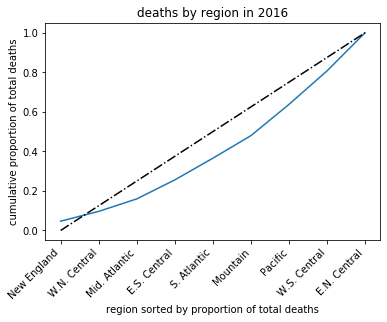

In [90]:
# plotting of cumulative sum for total number of deaths 
cs_df = np.cumsum(prop_death_df)

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(cs_df)
plt.plot([0,8],[0,1],'k-.')
ax.set_xticklabels(cs_df.index, rotation = 45, ha="right")
plt.ylabel('cumulative proportion of total deaths')
plt.xlabel('region sorted by proportion of total deaths')
plt.title('deaths by region in 2016')

In [91]:
# significance using a one-sample kolmogorov smirnov 
stats.kstest(prop_death_df, 'norm')


KstestResult(statistic=0.5187096401713306, pvalue=0.008902623344996325)